In [3]:
import os
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import shutil

In [6]:
# Settings
rootpath = r"logs/_results"
alphabet = "abcdefghijklmnopqrstuvwxyz"
isPrintAlphabet = False
fontsize = 20
rows = 2
cols = 5
savepath = r"logs/_results_paper"

offset = np.array([[1, 0], [1, 0.5]])

# Set dataset (selected examples, please uncomment as needed)
setName = "AID"
degrade = "x4.0"  # scale factor
img_name = "church_64.png"
zoom_p = np.array([[320, 120], [400, 280]])
zoom_size = [100, 100]

In [4]:
def addborder(im, border_color, border_size):
    return ImageOps.expand(im, border=border_size, fill=tuple(border_color))

In [59]:
def draw_box_zoom(img, zoom_p, zoom_size, offset):
    rgb = np.array([[255, 0, 0], [0, 0, 255]])  # Define colors for the borders
    x_length, y_length = zoom_size
    width = 4
    zoom_border = 6
    ori_size = img.size

    draw = ImageDraw.Draw(img)
    for z_idx, (z_x, z_y) in enumerate(zoom_p):
        rgb_temp = tuple(rgb[z_idx % len(rgb)])
        # Draw rectangle borders
        draw.rectangle(
            [z_y, z_x, z_y + y_length, z_x + x_length], outline=rgb_temp, width=width
        )

    # Prepare image for zoom views with borders
    rimg = Image.new(
        "RGB", (ori_size[0], ori_size[1] + int(ori_size[1] * 0.5)), "white"
    )
    rimg.paste(img, (0, 0))

    for z_idx, (z_x, z_y) in enumerate(zoom_p):
        rgb_temp = tuple(rgb[z_idx % len(rgb)])
        # Crop and resize the zoom area
        im_zoom = img.crop((z_y, z_x, z_y + y_length, z_x + x_length))
        im_zoom = im_zoom.resize(
            (int(ori_size[0]/2), int(ori_size[1]/2)), Image.LANCZOS
        )
        # im_zoom = addborder(im_zoom, rgb_temp, zoom_border)
        plt.imshow(im_zoom)
        print(im_zoom.size)

        offset_temp = np.round(np.multiply(offset[z_idx], ori_size)).astype(int)
        print(offset_temp)
        rimg.paste(
            im_zoom, (offset_temp[1], offset_temp[0])
        )
    return rimg

(300, 300)
[600   0]
(300, 300)
[600 300]


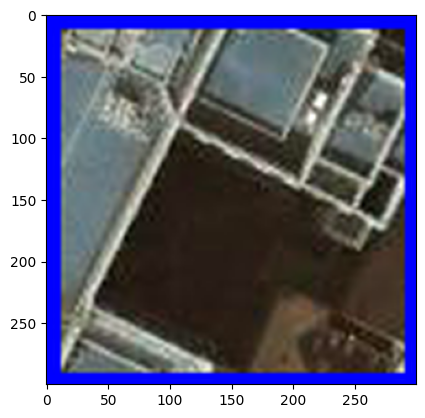

In [60]:
# Main processing
hr_path = os.path.join(rootpath, setName, "HR")
rslt_img_scale = 150 / zoom_size[0]
zoom_image_dir = os.path.join(savepath, "zoom_image", f"{setName}_{degrade}")

if not os.path.exists(zoom_image_dir):
    os.makedirs(zoom_image_dir)

im_hr = Image.open(os.path.join(hr_path, img_name))
ori_size = im_hr.size
im_hr = draw_box_zoom(im_hr, zoom_p, zoom_size, offset)

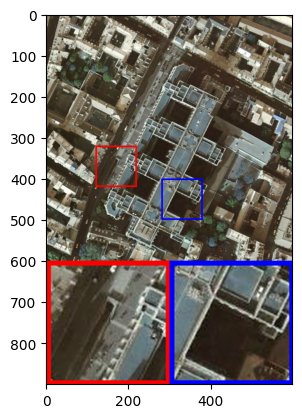

In [61]:
plt.imshow(im_hr)

In [1]:
def scalings_for_boundary_conditions(timestep, sigma_data=0.5, timestep_scaling=10.0):
    c_skip = sigma_data**2 / ((timestep / 0.1) ** 2 + sigma_data**2)
    c_out = (timestep / 0.1) / ((timestep / 0.1) ** 2 + sigma_data**2) ** 0.5
    return c_skip, c_out


In [20]:
for i in range(1000):
    a, b = scalings_for_boundary_conditions(i/1000)
    print(i, a, b)

0 1.0 0.0
1 0.9999960000160001 0.0019999960000120004
2 0.9999840002559959 0.0039999680003839945
3 0.9999640012959534 0.005999892002915913
4 0.9999360040957378 0.007999744012287344
5 0.9999000099990001 0.009999500037496877
6 0.9998560207330145 0.011999136093300802
7 0.9998040384084719 0.013998628201651063
8 0.999744065519227 0.015997952393132134
9 0.9996761049419988 0.017997084708396737
10 0.9996001599360256 0.01999600119960014
11 0.999516234142675 0.021994677931832844
12 0.9994243315850071 0.02399309098455145
13 0.999324456667293 0.025991216453007546
14 0.9992166141744873 0.027989030449674348
15 0.9991008092716556 0.029986509105671005
16 0.9989770475033567 0.031983628572184196
17 0.9988453347929794 0.03398036502188703
18 0.9987056774420352 0.03597669465035493
19 0.9985580821294051 0.037972593677478246
20 0.998402555910543 0.039968038348871575
21 0.9982391062166338 0.04196300493727947
22 0.9980677408537073 0.043957469743978406
23 0.9978884680017084 0.045951409100174666
24 0.997701296213